#<font color = 'Orange'>Scraping page</font>
You need to scrape the phones with their price from: https://mobelix.com.mk/mk/mobilni-telefoni

The informations you need to extract are:


*   Phone brand: html tag (\<h5 class="mb-0">\)
*   Phone type: html tag (\<h3 class="h5 font-weight-normal">\)
*   Phone pruce: html tag (\<p class="h5 price">\)



# <font color='Orange'>Requirements specified for Web Scraping</font> (0.1 POINTS)


Import all libraries and modules that you are going to use.

In [2]:
#start here
#shift+enter in this box will run the code that's here and open a new code-box below
#import ....
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import date
import requests
from bs4 import BeautifulSoup
from IPython.display import HTML
import matplotlib.pyplot as plt
import warnings

requests.packages.urllib3.disable_warnings()
warnings.filterwarnings("ignore")

# <font color = 'Orange'> Start the scraping by sending HTTP request</font> (0.3 POINTS)


 **Fetch a website's content - send request**

In [3]:
#add your code
snapshot = requests.get("https://mobelix.com.mk/mk/mobilni-telefoni")
snapshot

<Response [200]>

**Get the response-status code and see:**
<li>If the code starts with a 2, it means the request was successful.



In [4]:
#add your code
snapshot

<Response [200]>

# <font color = 'orange'>Parse the HTML with BeautifulSoup</font> (0.3 POINTS)

Beautiful Soup is a Python library for pulling data out of HTML and XML files. It works with your favorite parser to provide idiomatic ways of navigating, searching, and modifying the parse tree. It commonly saves programmers hours or days of work.


**Parse using BeautifulSoap**




In [5]:
#add your code
soup = BeautifulSoup(snapshot.text, 'html.parser')

**Print the HTML code that you get**

In [6]:
#add your code
soup

<!DOCTYPE html>

<html lang="en">
<head>
<!-- Required meta tags -->
<meta charset="utf-8"/>
<title>Мобилни телефони | Mobelix Premium Mobilara</title>
<meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>
<meta content="Мобилни телефони | Mobelix Премиум Мобилара" name="title"/>
<meta content="Mobile Store I Service | Mobelix Premium Mobilara Skopje нуди најголем избор на премиум додатоци за мобилни телефони: маски за мобилни телефони, диспеј, полначи, полначи за кола, бежични полначи, power bank, bluetooth слушалки, usb кабли, фолии и стакла за дисплеј и др." name="description"/>
<meta content="mobilara, mobilara skopje, mobilni dodatoci, мобилни додатоци, полначи, бежични полначи, power bank, Bluetooth slusalki, maski za telefoni" name="keywords"/>
<meta content="Mobelix Премиум Мобилара" property="og:site_name">
<meta content="http://mobelix.com.mk/mk/mobilni-telefoni" property="og:url">
<meta content="Мобилни телефони | Mobelix Премиум Мобилара" p

# <font color='Orange'>Extracting data</font> (0.7 POINTS)

From the printed HTML code search for the data you need for building the dataset, by the classes that are given above in the html tags listed.



**Try to select the first element from your attributes. Find out from the html code what part do you need.**

In [7]:
#add your code
soup.select_one("h5.mb-0")

<h5 class="mb-0">Blackberry</h5>

**Add as many codeboxes as you need for selecting all the html elements**

In [8]:
#add your code
phone_brand_soup = soup.select("h5.mb-0")
phone_type_soup = soup.select("h3.h5.font-weight-normal")
phone_price_soup = soup.select("p.h5.price")

**Create lists with the extracted data from the html elements that you selected**

In [9]:
#add your code
phone_brand = [brand.text for brand in phone_brand_soup]
phone_type = [typ.text for typ in phone_type_soup]
for pps in phone_price_soup:
  if pps:
    del_element = pps.find('del')
    if del_element:
      del_element.extract()
phone_price = [price.text for price in phone_price_soup]

**Print all lists that are containing the elements**

In [10]:
#add your code
print(phone_brand)
print(phone_type)
print(phone_price)

['Blackberry', 'Samsung', 'Samsung', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple']
['Porsche Design P9981', 'Galaxy A03s 4/64GB', 'Galaxy A04s 3/32GB', 'iPhone 14 Pro Max 128GB E-SIM', 'iPhone 14 Pro 512GB', 'iPhone 14 Pro Max 512GB', 'iPhone 14 Pro Max 1TB', 'iPhone 14 Pro 128GB E-SIM', 'iPhone 13 Mini 256GB']
['19,000.00 ден', '8,300.00 ден', '8,300.00 ден', '61,500.00 ден', '89,200.00 ден', '78,100.00 ден', '98,400.00 ден', '55,300.00 ден', '46,800.00 ден']


**Check if all lists are the same size**

In [11]:
#add your code
print(len(phone_brand) == len(phone_type) == len(phone_price))

True


# <font color='Orange'>Create a Pandas DataFrame</font> (0.1 POINTS)


**Create the DataFrame from the lists you get and name your *Columns***

In [12]:
#add your code
matrix = []
for i in range(len(phone_brand)):
  row = {}
  row['Brand'] = phone_brand[i]
  row['Type'] = phone_type[i]
  row['Price'] = phone_price[i]
  matrix.append(row)
df = pd.DataFrame(matrix)

**Print the dataset you obtain**

In [13]:
#add your code
df

,Brand,Type,Price
0,Blackberry,Porsche Design P9981,"19,000.00 ден"
1,Samsung,Galaxy A03s 4/64GB,"8,300.00 ден"
2,Samsung,Galaxy A04s 3/32GB,"8,300.00 ден"
3,Apple,iPhone 14 Pro Max 128GB E-SIM,"61,500.00 ден"
4,Apple,iPhone 14 Pro 512GB,"89,200.00 ден"
5,Apple,iPhone 14 Pro Max 512GB,"78,100.00 ден"
6,Apple,iPhone 14 Pro Max 1TB,"98,400.00 ден"
7,Apple,iPhone 14 Pro 128GB E-SIM,"55,300.00 ден"
8,Apple,iPhone 13 Mini 256GB,"46,800.00 ден"


#<font color='orange'>EDA</font> (0.2 POINTS)

## <font color='Orange'>Find statistic elements for the prices</font>
Like mean, median,  standard deviation, minimum, maximum

In [14]:
#add your code
df_price = df['Price'].str.replace(',', '').str.replace(' ден', '').astype(float)
mean = df_price.mean()
median = df_price.median()
std = df_price.std()
min = df_price.min()
max = df_price.max()

print(mean)
print(median)
print(std)
print(min)
print(max)

51655.555555555555
55300.0
34010.112875110804
8300.0
98400.0


# <font color = 'Orange'>Data visualization </font> (0.3 POINTS)

Make a histogram & bar chart for the price values

In [15]:
#add your code
%matplotlib inline
import matplotlib.pyplot as plt

In [16]:
new_df = df
new_df['Price'] = df_price
new_df

,Brand,Type,Price
0,Blackberry,Porsche Design P9981,19000.0
1,Samsung,Galaxy A03s 4/64GB,8300.0
2,Samsung,Galaxy A04s 3/32GB,8300.0
3,Apple,iPhone 14 Pro Max 128GB E-SIM,61500.0
4,Apple,iPhone 14 Pro 512GB,89200.0
5,Apple,iPhone 14 Pro Max 512GB,78100.0
6,Apple,iPhone 14 Pro Max 1TB,98400.0
7,Apple,iPhone 14 Pro 128GB E-SIM,55300.0
8,Apple,iPhone 13 Mini 256GB,46800.0


(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.]),
 [Text(0.0, 0, '0'),
  Text(20000.0, 0, '20000'),
  Text(40000.0, 0, '40000'),
  Text(60000.0, 0, '60000'),
  Text(80000.0, 0, '80000'),
  Text(100000.0, 0, '100000'),
  Text(120000.0, 0, '120000')])

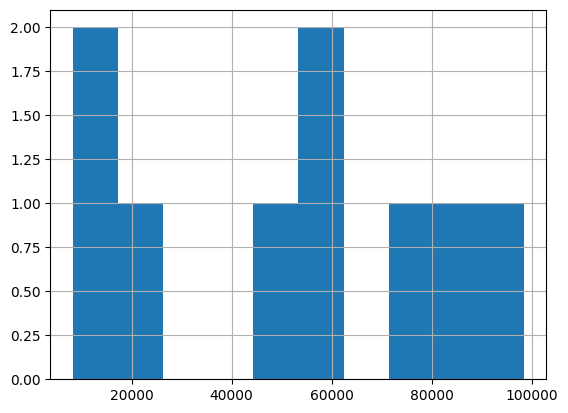

In [17]:
new_df['Price'].hist()
plt.xticks(rotation = 0)

<Figure size 640x480 with 0 Axes>

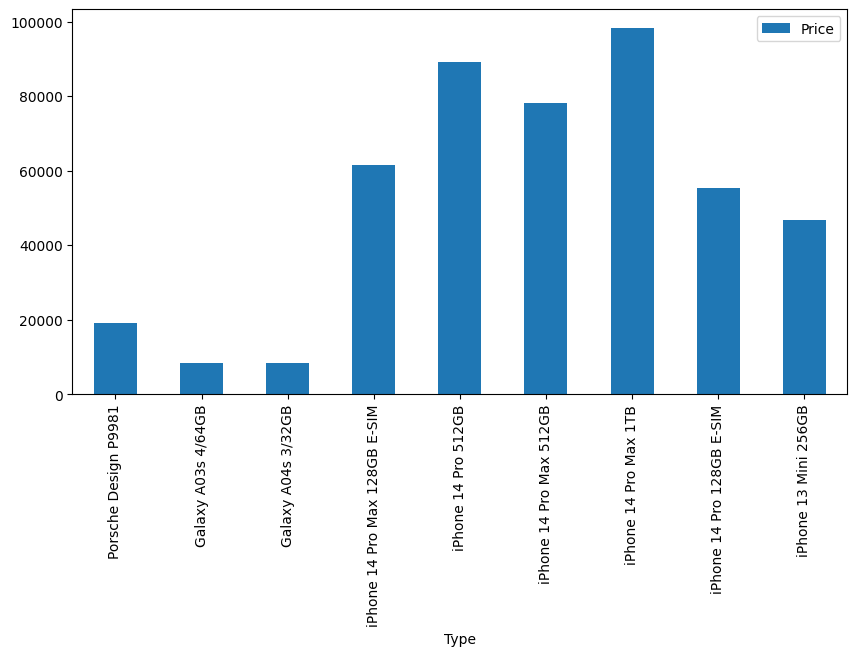

In [18]:
fig = plt.figure()
ax = new_df.plot.bar(rot=90, x='Type', figsize=(10, 5))
ax.set_xticklabels(new_df['Type'])
fig.show()